<a href="https://colab.research.google.com/github/yihimin/mbti_test/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,270 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

[lhm 코드1]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#1. 데이터 준비
dates = pd.date_range(start="2024-11-01", periods=14)
tempN = [15.3 ,18.1,17.6,14.8,9.1,7.5,7.8,10.2,12.9,14.4,14.6,14.3,14.2,14.8]

#11월 서울의 온도
data = pd.DataFrame({"Date":dates, "tempN":tempN})
dataS = data.set_index("Date", inplace=False)
dataS

,tempN
Date,
2024-11-01,15.3
2024-11-02,18.1
2024-11-03,17.6
2024-11-04,14.8
2024-11-05,9.1
2024-11-06,7.5
2024-11-07,7.8
2024-11-08,10.2
2024-11-09,12.9


[lhm 코드2]

In [4]:
#2. ARIMA 모델 만들기
#dataS["tempN"]는 11월 서울의 온도데이터
#order=(1,1,1)은 예측을 위한 설정값

modelS = ARIMA(dataS["tempN"], order=(1,1,1))

#3. 모델학습하기
fitted_modelS=modelS.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[lhm 코드3]

In [5]:
#4. 11월 15일 서울 온도 예측하기
tomorrowS = fitted_modelS.forecast(steps=1)
print(dates[-1] + pd.Timedelta(days=1))
print("11월 15일 서울온도:", tomorrowS[0])

2024-11-15 00:00:00
11월 15일 서울온도: 15.271930967723158


<ipython-input-5-52b0adc7dfc0>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("11월 15일 서울온도:", tomorrowS[0])


[lhm 코드4]

<ipython-input-6-c5098cf38fa4>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataS.index[-1]+ pd.Timedelta(days=1), tomorrowS[0], label="T서울11월15일온도", marker='o', color='red')


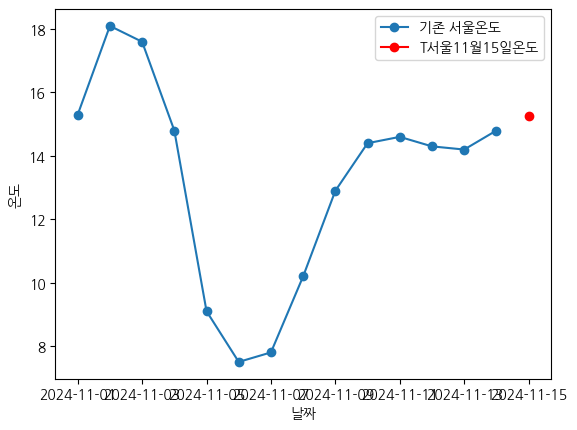

In [6]:
#5. 시각화
#폰트설정
plt.rc('font', family='NanumGothic')

plt.plot(dataS.index, data["tempN"], label="기존 서울온도", marker='o')
plt.plot(dataS.index[-1]+ pd.Timedelta(days=1), tomorrowS[0], label="T서울11월15일온도", marker='o', color='red')
plt.xlabel("날짜")
plt.ylabel("온도")

plt.legend()
plt.show()

[lhm 코드5]

In [6]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()



Saving 강우량데이터.csv to 강우량데이터.csv


[lhm 코드6]

In [7]:
import pandas as pd

# 업로드된 파일 읽기
data = pd.read_csv('강우량데이터.csv', encoding='cp949')
print(data.head())


           날짜   지점  강수량(mm)
0  2024-11-01  108      NaN
1  2024-11-02  108      NaN
2  2024-11-03  108      0.0
3  2024-11-04  108      0.1
4  2024-11-05  108      NaN


[lhm 코드6]

In [8]:
# 결측값을 0으로 대체
data['강수량(mm)'] = data['강수량(mm)'].fillna(0)

# 결과 확인
print(data.head())


           날짜   지점  강수량(mm)
0  2024-11-01  108      0.0
1  2024-11-02  108      0.0
2  2024-11-03  108      0.0
3  2024-11-04  108      0.1
4  2024-11-05  108      0.0


[lhm 코드7]

In [18]:
# 불필요한 열 제거
# 결측값 처리 (0으로 대체)
data['강수량(mm)'] = data['강수량(mm)'].fillna(0)

# 결과 확인
print(data.head())
print(data['강수량(mm)'].describe())


           날짜  강수량(mm)
0  2024-11-01      0.0
1  2024-11-02      0.0
2  2024-11-03      0.0
3  2024-11-04      0.1
4  2024-11-05      0.0
count    14.000000
mean      0.014286
std       0.036314
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.100000
Name: 강수량(mm), dtype: float64


[lhm 코드8]

In [15]:
# 강우량 평균, 최대값, 최소값
mean_rain = data['강수량(mm)'].mean()
max_rain = data['강수량(mm)'].max()
min_rain = data['강수량(mm)'].min()

print("평균 강우량:", mean_rain)
print("최대 강우량:", max_rain)
print("최소 강우량:", min_rain)

# 강수량이 기록된 날의 비율
rain_days = len(data[data['강수량(mm)'] > 0])
total_days = len(data)
rain_ratio = (rain_days / total_days) * 100

print("비가 온 날의 비율: {:.2f}%".format(rain_ratio))


평균 강우량: 0.014285714285714287
최대 강우량: 0.1
최소 강우량: 0.0
비가 온 날의 비율: 14.29%


[lhm 코드9]

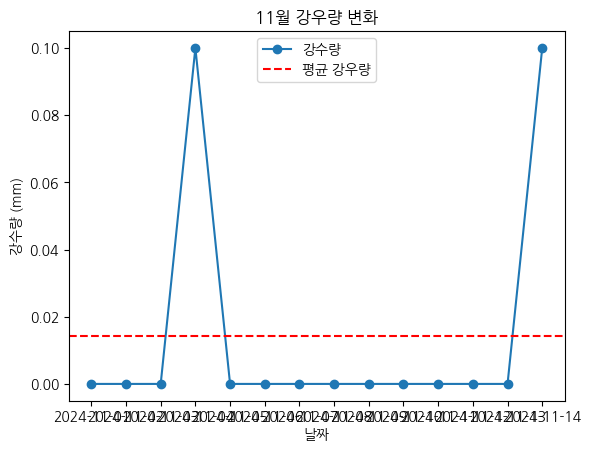

In [23]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
# 강우량 꺾은선 그래프
plt.plot(data['날짜'], data['강수량(mm)'], marker='o', label='강수량')
plt.axhline(y=mean_rain, color='r', linestyle='--', label='평균 강우량')
plt.xlabel('날짜')
plt.ylabel('강수량 (mm)')
plt.title('11월 강우량 변화')
plt.legend()
plt.show()



[lhm 코드10]

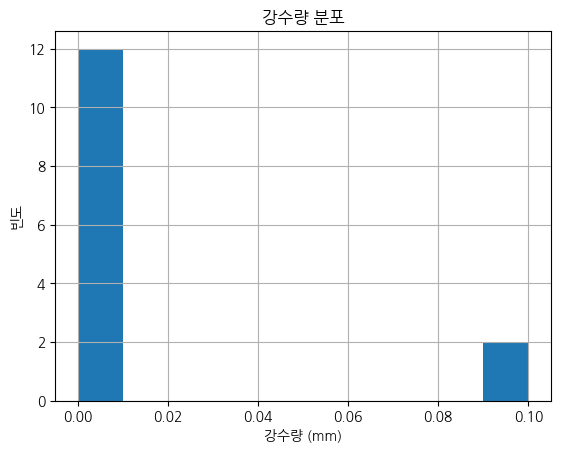

In [24]:
plt.rc('font', family='NanumGothic')
data['강수량(mm)'].hist(bins=10)
plt.xlabel('강수량 (mm)')
plt.ylabel('빈도')
plt.title('강수량 분포')
plt.show()


[lhm 코드10]

In [26]:
import pandas as pd
import numpy as np

# 데이터 준비
dates = pd.date_range(start="2024-11-01", periods=14)
tempN = [15.3, 18.1, 17.6, 14.8, 9.1, 7.5, 7.8, 10.2, 12.9, 14.4, 14.6, 14.3, 14.2, 14.8]
rainfall = [0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1]

# 데이터프레임 생성
data = pd.DataFrame({"날짜": dates, "tempN": tempN, "강수량(mm)": rainfall})

# 날짜를 인덱스로 설정
data.set_index("날짜", inplace=True)

# 상관계수 계산
correlation = data["tempN"].corr(data["강수량(mm)"])
print("온도와 강수량 상관계수:", correlation)


온도와 강수량 상관계수: 0.3788579775217105


[lhm 코드11]

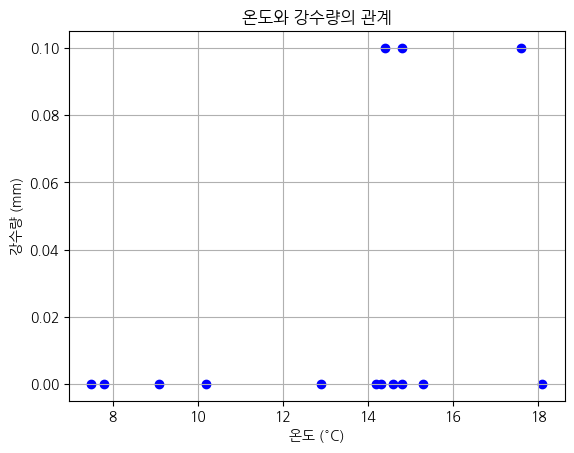

In [27]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(data['tempN'], data['강수량(mm)'], color='blue')
plt.title('온도와 강수량의 관계')
plt.xlabel('온도 (°C)')
plt.ylabel('강수량 (mm)')
plt.grid()
plt.show()
